# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

### Import functions ###
from utils.Auxiliary import *


# Input


In [2]:
### Combinations ###
DataTypeVec = ["BostonHousingBinned"]
ModelTypeVec = ["TreeFarms"]
RelativeVec = ["Passive", None]
Combinations = list(itertools.product(DataTypeVec, ModelTypeVec, RelativeVec))


In [3]:
DataType = "BostonHousingBinned"
RandomForest = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousing/RandomForestClassification/ProcessedResults/MTRandomForestClassification_UEI0_NE100_Reg0.01_RBA0.01_ErrorMatrix.csv")
DUREAL025 = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousing/TreeFarms/ProcessedResults/MTTreeFarms_UEI0_NE100_Reg0.01_RBA0.025_ErrorMatrix.csv")
UNREAL025 = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousing/TreeFarms/ProcessedResults/MTTreeFarms_UEI1_NE100_Reg0.01_RBA0.025_ErrorMatrix.csv")
DUREAL01 = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousing/TreeFarms/ProcessedResults/MTTreeFarms_UEI0_NE100_Reg0.01_RBA0.01_ErrorMatrix.csv")
UNREAL01 = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Results/BostonHousing/TreeFarms/ProcessedResults/MTTreeFarms_UEI1_NE100_Reg0.01_RBA0.01_ErrorMatrix.csv")


(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

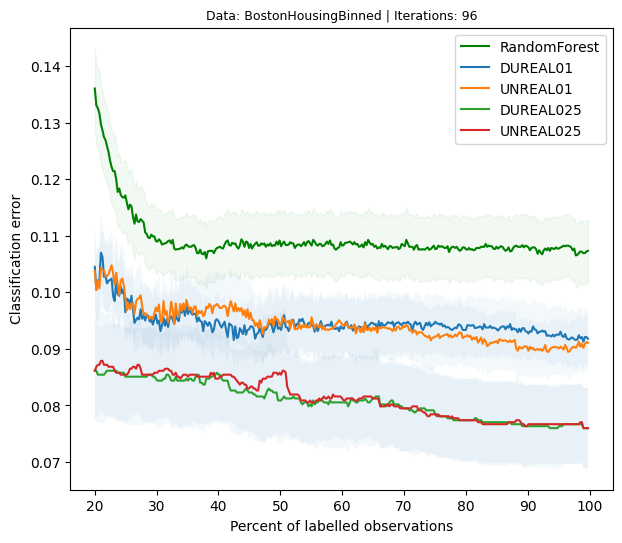

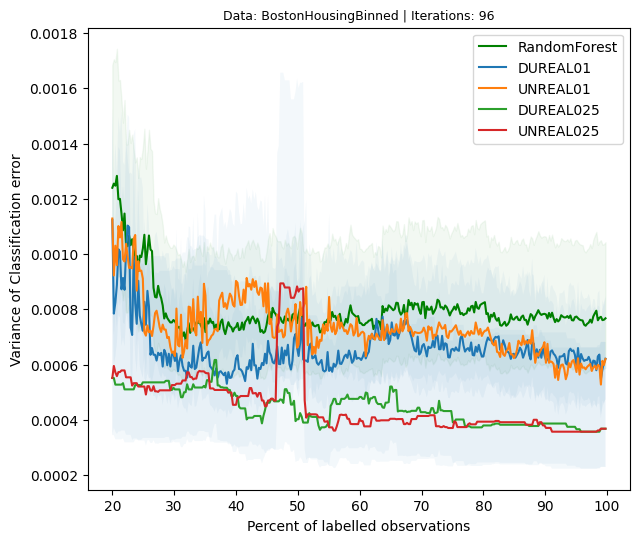

In [4]:
### Set Up ###
PlotSubtitle = (f"Data: {DataType} | Iterations: {RandomForest.shape[0]}")
colors = {"RandomForest": "green", "TreeFarms100_Duplicate": "orange"}

### Figure ##
MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForest,
                 DUREAL01 = DUREAL01,
                 UNREAL01 = UNREAL01,
                 DUREAL025 = DUREAL025,
                 UNREAL025 = UNREAL025,
                 Colors = colors,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.05,
                 CriticalValue = 1.96)

In [8]:
### Set Up ###
PlotSubtitle = (f"Data: {DataType} | Iterations: {RandomForest.shape[0]}")
colors = {"RandomForest": "green", "TreeFarms100_Duplicate": "orange"}

### Figure ##
MeanVariancePlot(RelativeError = None,
                 Colors = colors,
                 RandomForest = RandomForest,
                 # TreeFarms1_Unique = TreeFarms1_Unique,
                 # TreeFarms1_Duplicates = TreeFarms1_Duplicates,
                #  TreeFarms2_Unique = TreeFarms2_Unique,
                #  TreeFarms2_Duplicates = TreeFarms2_Duplicates,
                #  TreeFarms5_Unique = TreeFarms5_Unique,
                #  TreeFarms5_Duplicates = TreeFarms5_Duplicates,
                #  TreeFarms10_Unique = TreeFarms10_Unique,
                #  TreeFarms10_Duplicates = TreeFarms10_Dupicates,
                 TreeFarms100_Unique = TreeFarms100_Unique,
                 TreeFarms100_Dupicates = TreeFarms100_Dupicates,
                 Colors = colors,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.05,
                 CriticalValue = 1.96)

SyntaxError: keyword argument repeated: Colors (526223201.py, line 6)

---

In [ ]:
# ### Set Up ###
# WRSTResultsDict = {}

# ### Get Results ###
# for i in range(0, len(Combinations)):

#     ### Set Up ###
#     DataType = Combinations[i][0]
#     ModelType = Combinations[i][1]
#     RelativeType = Combinations[i][2]
#     PlotArgs = {"TransparencyVal" : 0.00, "CriticalValue" : 1.96, "RelativeError" : RelativeType}
    
#     ### Get Results ###
#     WRSTResults, MeanPlot, VariancePlot =  MakePlotFunctions(DataType, ModelType, PlotArgs, SaveInput = "Dec2")
    
#     ### Save WRST Results ###
#     if DataType not in WRSTResultsDict:
#         WRSTResultsDict[DataType] = {}
#     WRSTResultsDict[DataType][ModelType] = WRSTResults